# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**ISRAEL, EZEMA**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd                  # For data loading
import numpy as np                   # For data manipulation
import matplotlib.pyplot as plt      # For data visulisation
import seaborn as sns                # For data visulisation

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression          # For Linear Regression
from sklearn import metrics                                # For implementations of common error metrics
from statsmodels.graphics.correlation import plot_corr     # To plot correlation heatmap

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

Next we will load our data as a Pandas DataFrame

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
# LOAD THE DATA
# Set index_col = 0; To remove index column
df_test = pd.read_csv(r'C:\Users\USER\Desktop\EXPLORE Acadamy\5.0 Advanced-Regression-Starter-Data-3036\Advanced-Regression-Starter-Data\df_test.csv', index_col = 0)
df_train = pd.read_csv(r'C:\Users\USER\Desktop\EXPLORE Acadamy\5.0 Advanced-Regression-Starter-Data-3036\Advanced-Regression-Starter-Data\df_train.csv')

In [3]:
# CHECK & Review Loaded Data
df_train.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


Observed Unnamed Column from the Dataset that needs to be DROPPED because ........

In [4]:
# Drop Unnamed: 0 column
df_train = df_train.drop("Unnamed: 0", axis=1)

In [5]:
# CHECK Dataset again
df_train.head(2)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


In [6]:
# View Column Names for possible White Spaces
df_train.columns

Index(['time', 'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min'

No Column Name with White Spaces

NEXT we proceed to EDA (Exploratory Data Analysis) to gain further Insight about the Variables in our Dataset

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [7]:
# We start by viewing the Shape of Datasets
print(f'Shape of Train_Dataset {df_train.shape}')
print(f'Shape of Test_Dataset {df_test.shape} :- Excludes load_shortfall_3h column') 

Shape of Train_Dataset (8763, 48)
Shape of Test_Dataset (2920, 47) :- Excludes load_shortfall_3h column


Our Shape looks good;
* For the TRAIN dataset; we have 8763 rows and 48 columns
* And for our TEST dataset; we have 2920 rows and 47 columns excluding our dependent variable "load_shortfall_3h"

NEXT we move further to verify the DataTypes and Check for possible missing values PER Column

In [8]:
# look at data statistics
df_train.info()          # Check for data types and number of entries of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [9]:
# Confirming Total missing values from Valencia_pressure
df_train['Valencia_pressure'].isnull().sum()

2068

Our Outcome Includes; 

1. Identified 3(three) of our Potential features having datatype OBJECT (Categorical)
       a. Valencia_wind_deg --> Covert to Numerical 
       b. Seville_pressure  --> Covert to Numerical 
       c. time              --> Covert to DateTime
2. Valencia_pressure  has   6695 non-null   Instead of 8763 (TOTAL MISSING VALUE = 2068)

In [13]:
# Visualizing the Category distribution of Features with OBJECT Datatypes 

print('Valencia_wind_deg = ', np.unique(df_train[['Valencia_wind_deg']].values))
print('\n')   # Line Break
print('Seville_pressure = ', np.unique(df_train[['Seville_pressure']].values))

Valencia_wind_deg =  ['level_1' 'level_10' 'level_2' 'level_3' 'level_4' 'level_5' 'level_6'
 'level_7' 'level_8' 'level_9']


Seville_pressure =  ['sp1' 'sp10' 'sp11' 'sp12' 'sp13' 'sp14' 'sp15' 'sp16' 'sp17' 'sp18'
 'sp19' 'sp2' 'sp20' 'sp21' 'sp22' 'sp23' 'sp24' 'sp25' 'sp3' 'sp4' 'sp5'
 'sp6' 'sp7' 'sp8' 'sp9']


Valencia_wind_deg are Categorized between 
   * Level_1 to Level_10   
   
Seville_pressure are Categorized between
   * sp1  to  sp25

We first convert the "time" column to DATETIME datatype before applying the Dummy Variable Encoding if not, 
The dummy var. encoding will treat it as a categorized dataset resulting to over 8843 columns which is not right.

NEXT we then Apply the dummy encoding to the rest OBJECT datatype

In [10]:
# Convert to Datetime
df_train['time'] = pd.to_datetime(df_train['time']) 

In [6]:
df_train_dummies = pd.get_dummies(df_train, drop_first=True)
#  Argument drop_first=True is applied, so that we only create n-1 columns for each variable with n categories

df_train_dummies.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,...,0,0,1,0,0,0,0,0,0,0
1,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,...,0,0,1,0,0,0,0,0,0,0
2,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,...,0,0,1,0,0,0,0,0,0,0
3,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,...,0,0,1,0,0,0,0,0,0,0
4,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,...,0,0,1,0,0,0,0,0,0,0


In [12]:
# Confirmation Check
df_train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 81 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   time                        8763 non-null   datetime64[ns]
 1   Madrid_wind_speed           8763 non-null   float64       
 2   Bilbao_rain_1h              8763 non-null   float64       
 3   Valencia_wind_speed         8763 non-null   float64       
 4   Seville_humidity            8763 non-null   float64       
 5   Madrid_humidity             8763 non-null   float64       
 6   Bilbao_clouds_all           8763 non-null   float64       
 7   Bilbao_wind_speed           8763 non-null   float64       
 8   Seville_clouds_all          8763 non-null   float64       
 9   Bilbao_wind_deg             8763 non-null   float64       
 10  Barcelona_wind_speed        8763 non-null   float64       
 11  Barcelona_wind_deg          8763 non-null   float64     

So we are good

NEXT we treat Identified Valencia_pressure with a Total of 2068 missing values

But we must first get the Descriptive Statistics to gain the MEAN value required to replace the missing values

In [16]:
# Descriptive Statistics 
df_train.describe().T 

,count,mean,std,min,25%,50%,75%,max
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02
Barcelona_wind_speed,8763.0,2.870497,1.792197,0.000000,1.666667,2.666667,4.000000,1.266667e+01


The required mean value for Valencia_pressure ==> 1012.051407

Applying the mean value by means of DATA IMPUTATION into our Dataset

In [17]:
# Resolving Missing Values by Data Imputation
df_train_dummies['Valencia_pressure'].fillna(df_train_dummies['Valencia_pressure'].mean(), inplace = True)

In [20]:
# Confirmation Check
df_train_dummies['Valencia_pressure'].isnull().sum()

0

Looking Good

Finally we verify for possible duplicate values

In [21]:
# Check for Duplicate Entry
df_train.duplicated().sum()

0

No duplicates found. Dataset Ready for Correlation

NEXT we proceed to correlate our varriables

In [30]:
# evaluate correlation
df_train.corr('pearson') 

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,0.136591,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,0.177393,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800
Barcelona_wind_speed,0.294640,0.069997,0.347966,-0.138625,-0.058518,0.094019,0.275317,0.136591,0.177393,1.000000,...,0.084209,0.116240,0.123403,0.120361,0.109268,0.109692,0.130367,0.089365,0.084679,-0.103633


**From the Pearson Correlation Chat below we can understand the Correlation Between All our Independent features against our Dependent feature (Load_Shortfall_3h)**

We are adopting the Pearson Correlation because it measures the linear relationship between features & Assumes that the features are normally distributed

<div align="left" style="width: 800px; text-align: left;">
<img src="https://github.com/Explore-AI/Pictures/blob/f3aeedd2c056ddd233301c7186063618c1041140/regression_analysis_notebook/pearson_corr.jpg?raw=True"
     alt="Pearson Correlation"
     style="padding-bottom=0.5em"
     width=800px/>
</div>

To make more sense of our correlation numbers; Let's visualize it in our HEATMAP; the correlation between variables. This will aid in our variable selection

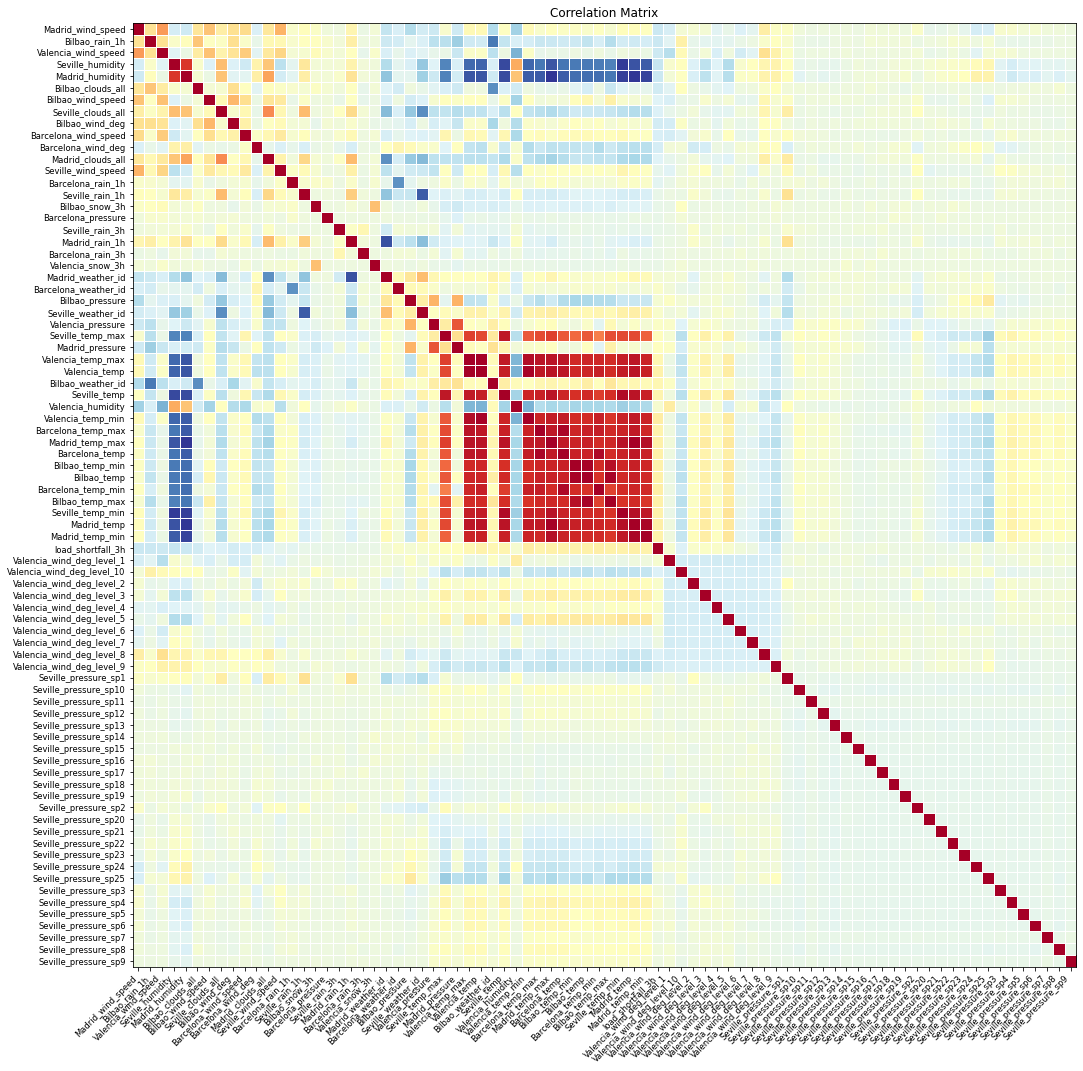

In [26]:
# Plotting the correlation heatmap
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_train_dummies.corr(), xnames = df_train_dummies.corr().columns, ax = ax);

We can see from the correlations that it's not be the best idea to keep all of the dummy variables.

If we use all of these variables, we're effectively working with superfluous or redundant information. Our model will also have collinearity issues:



This will likely be a problem when we build a model - let's check what an OLS model summary says.

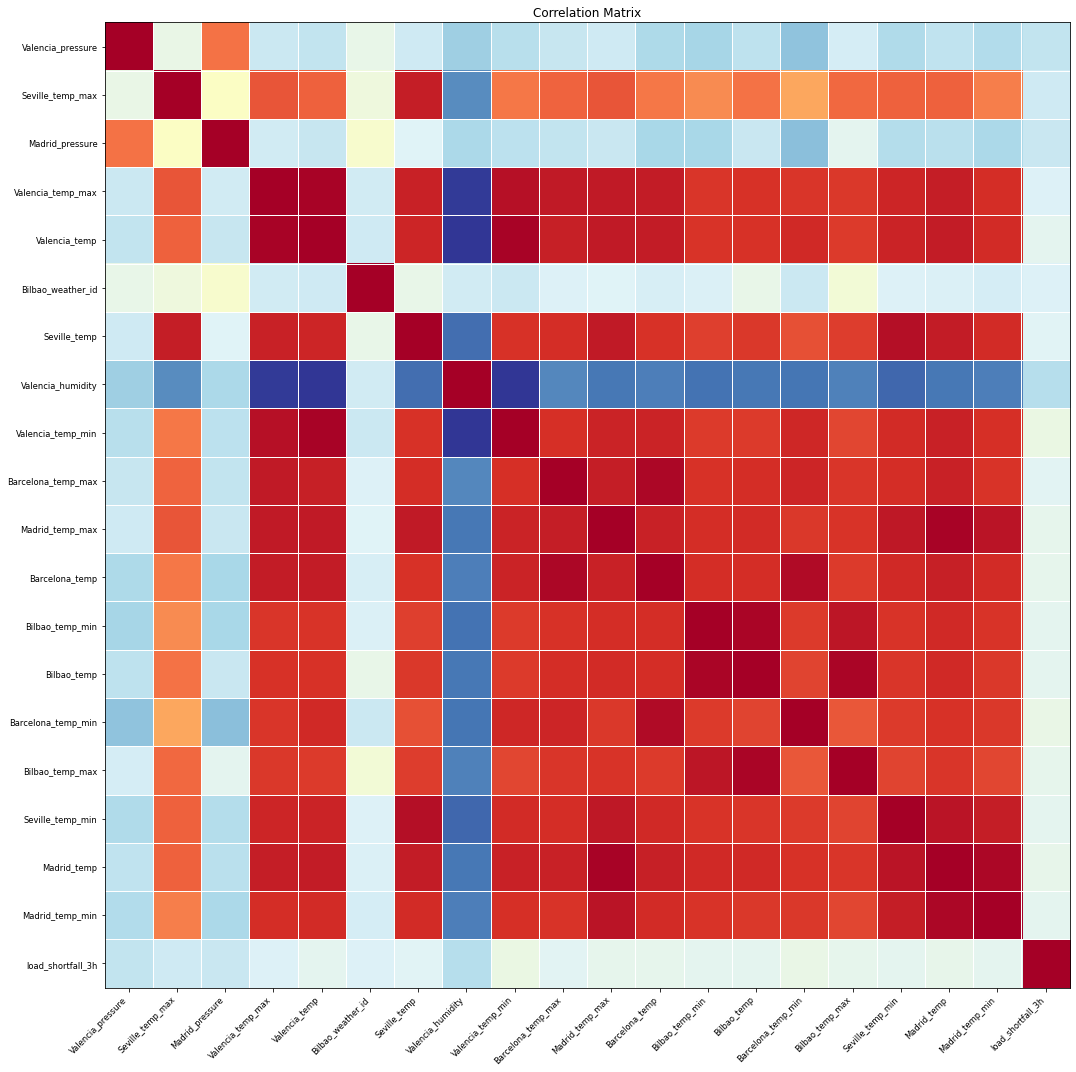

In [29]:
# Narrowing down to well-Correlated area of Our Heatmap Above
df = df_train_dummies[['Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure','Valencia_temp_max', 
                       'Valencia_temp', 'Bilbao_weather_id','Seville_temp', 'Valencia_humidity', 
                       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
                       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min','Bilbao_temp_max', 
                       'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h']]
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df.corr(), xnames = df.corr().columns, ax = ax);

In [ ]:
# plot relevant feature interactions

In [ ]:
# have a look at feature distributions


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features


In [ ]:
# create new features


In [ ]:
# engineer existing features


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic